In [2]:
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
import warnings
from mlxtend.classifier import StackingClassifier
import missingno as msno
from sklearn.ensemble import VotingClassifier
import shap
shap.initjs()
import lime
from lime import lime_tabular
warnings.simplefilter('ignore')
import os

In [3]:
insurance_df = pd.read_csv('data/train.csv', index_col='Id')
print(insurance_df.head())
insurance_df.shape


    Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
Id                                                                  
2                1             D3              10        0.076923   
5                1             A1              26        0.076923   
6                1             E1              26        0.076923   
7                1             D4              10        0.487179   
8                1             D2              26        0.230769   

    Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
Id                                                                       
2                2               1               1  0.641791  0.581818   
5                2               3               1  0.059701  0.600000   
6                2               3               1  0.029851  0.745455   
7                2               3               1  0.164179  0.672727   
8                2               3               1  0.417910  0.654545  

(59381, 127)

In [4]:
print(insurance_df['Response'].value_counts())
insurance_df['Modified_Response']  = insurance_df['Response'].apply(lambda x : 0 if x<=7 and x>=0 else (1 if x==8 else -1))

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64


In [5]:
# insurance_df.describe()
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 128 entries, Product_Info_1 to Modified_Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.4+ MB


In [6]:
category = 'Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41'
category = category.split(',')
print(type(category))
for i in category:
    i = i.strip()
    insurance_df[i] = insurance_df[i].astype(object)

<class 'list'>


In [7]:
categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype =='object']
numerical =  [col for col in insurance_df.columns if insurance_df[col].dtype !='object']
print(categorical)

['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_Hi

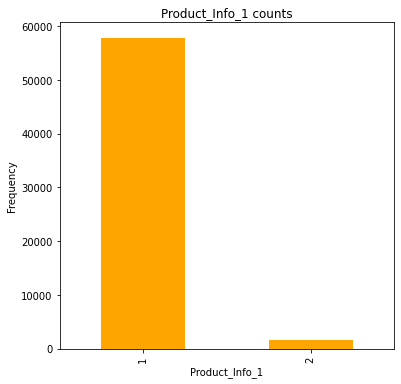

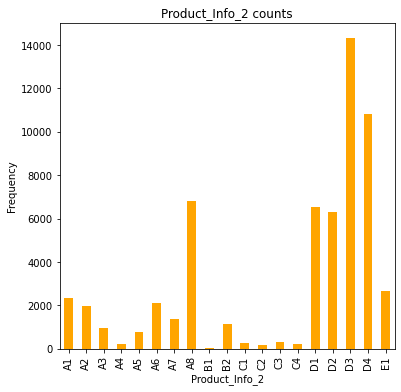

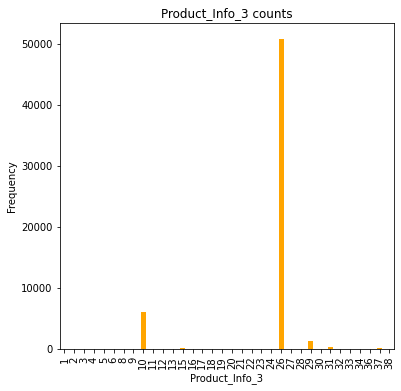

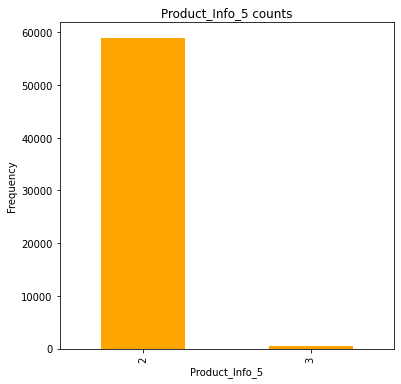

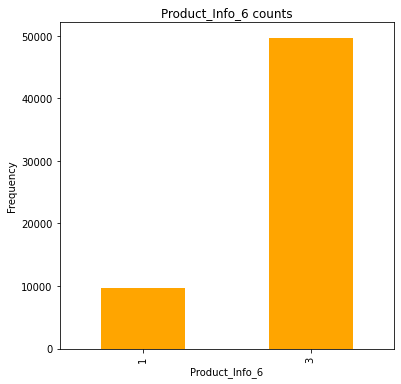

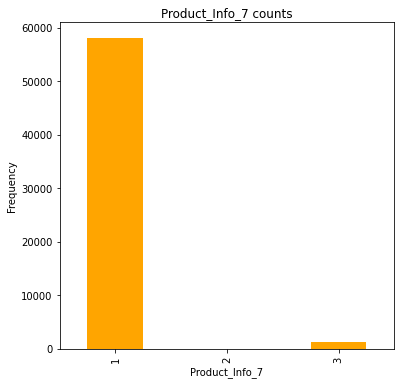

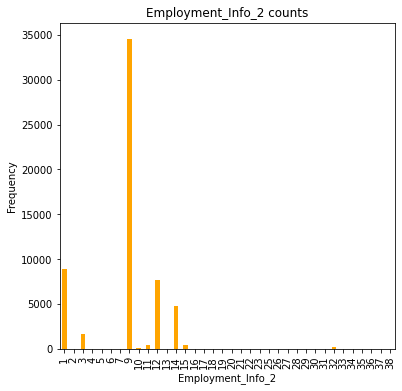

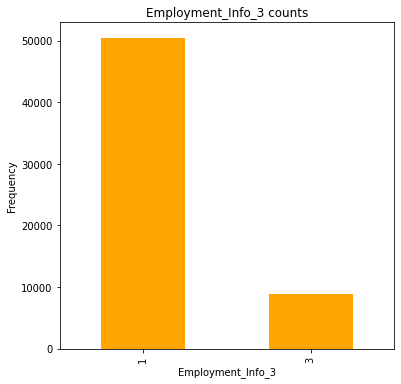

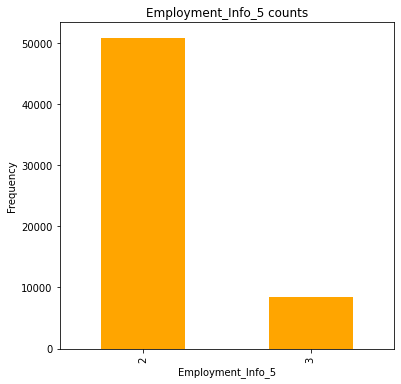

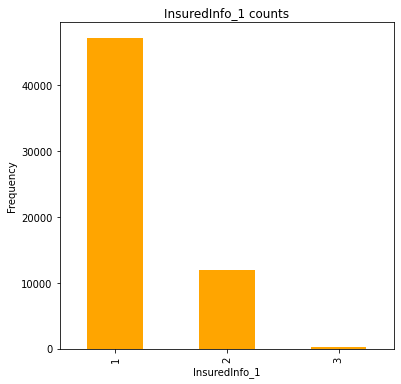

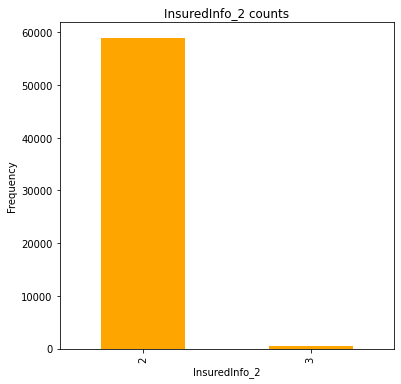

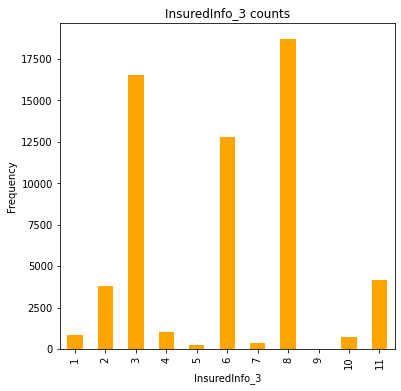

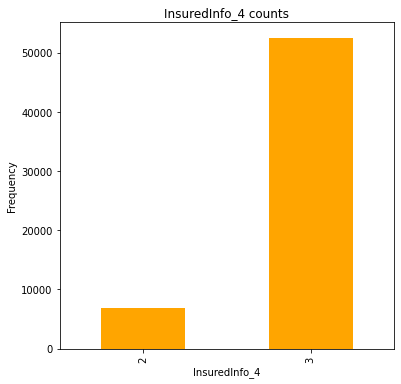

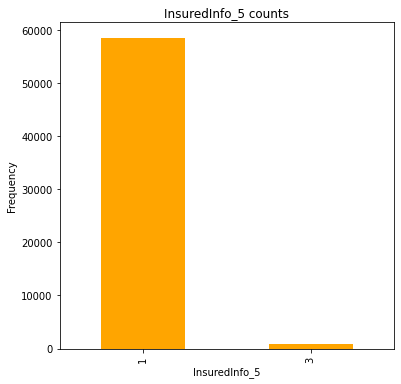

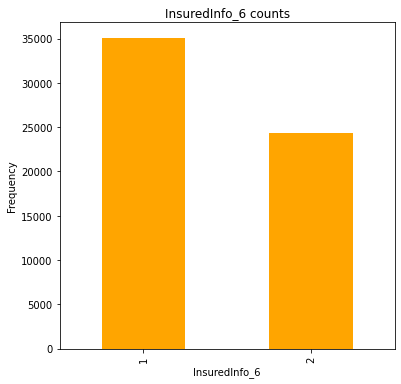

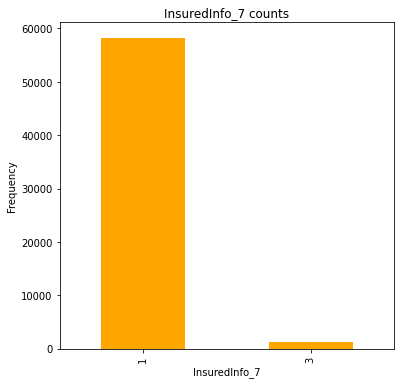

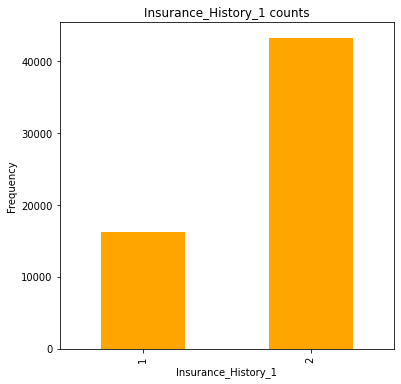

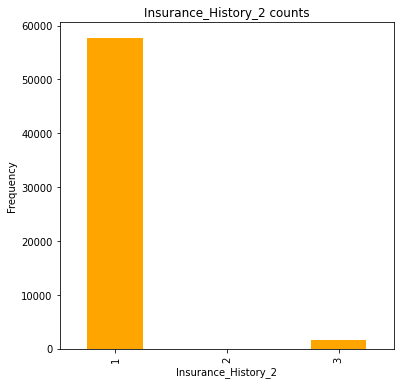

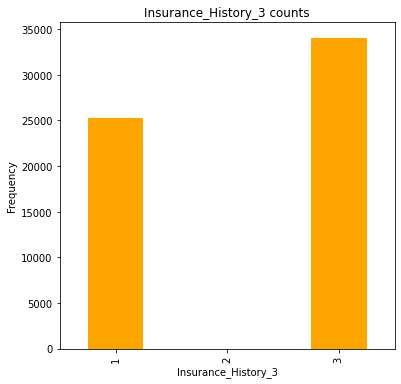

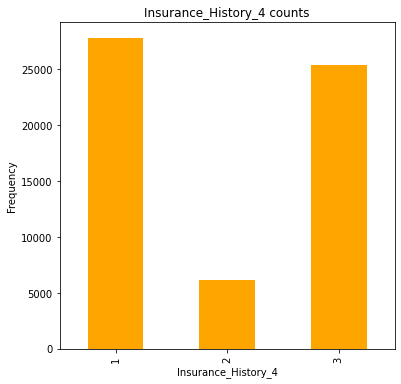

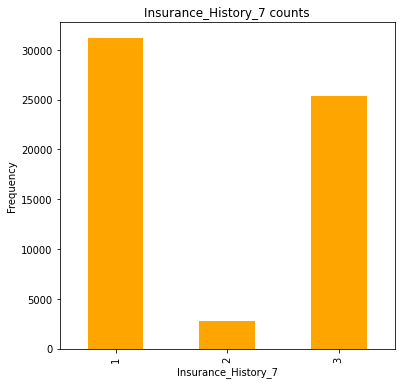

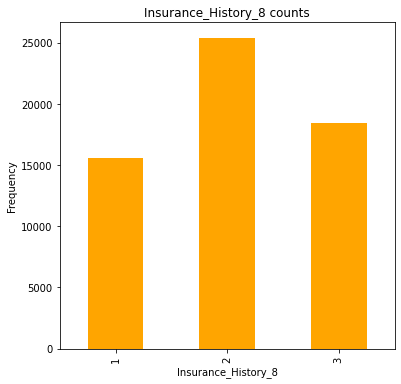

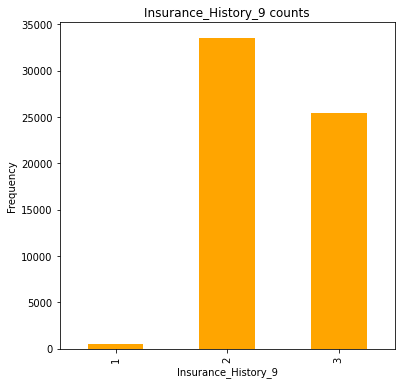

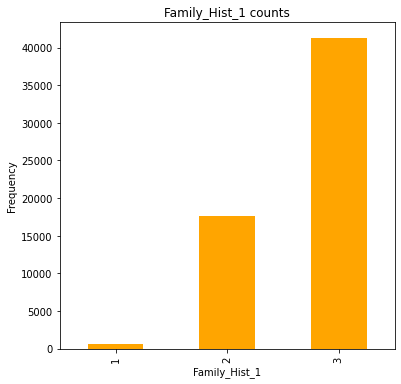

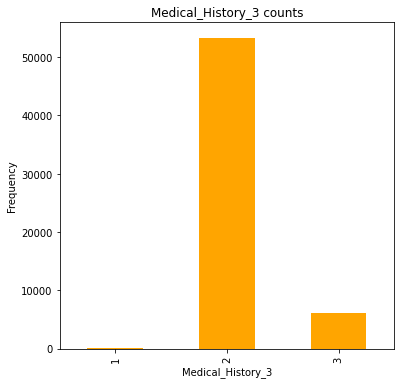

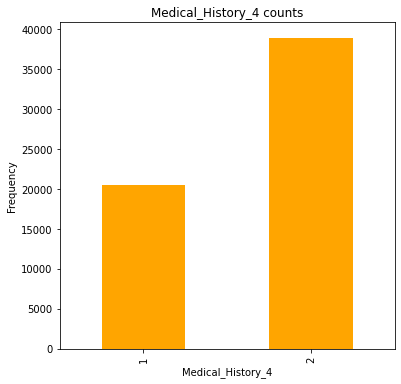

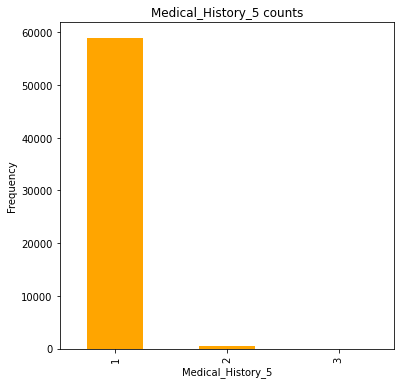

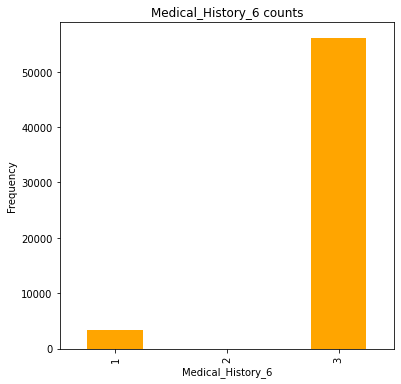

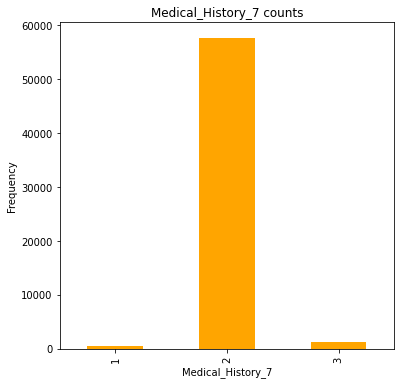

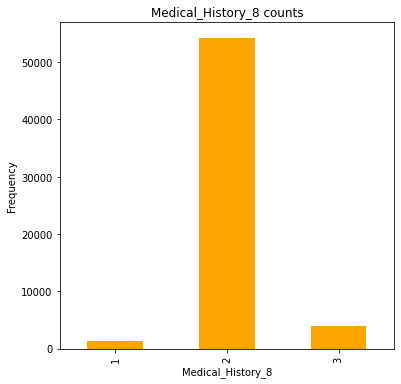

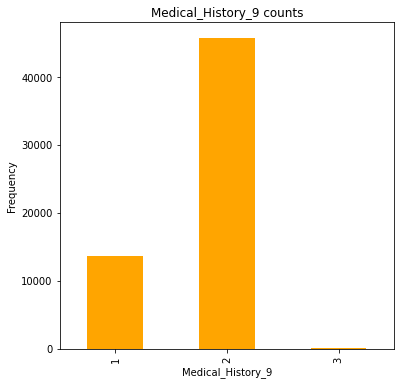

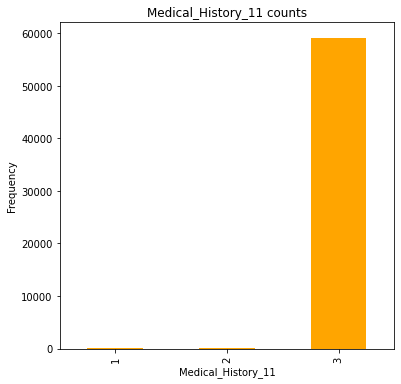

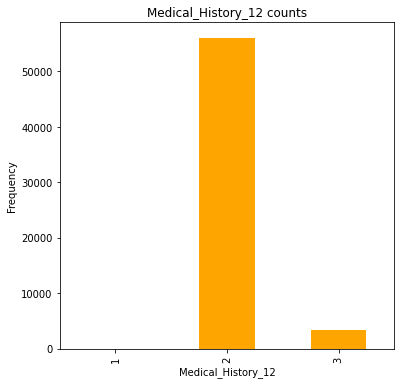

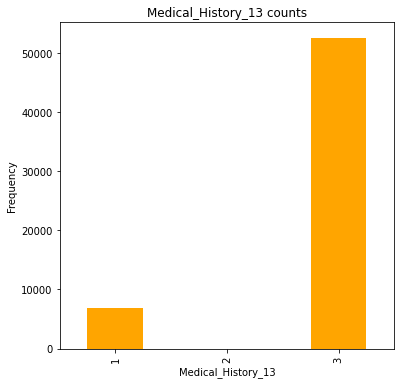

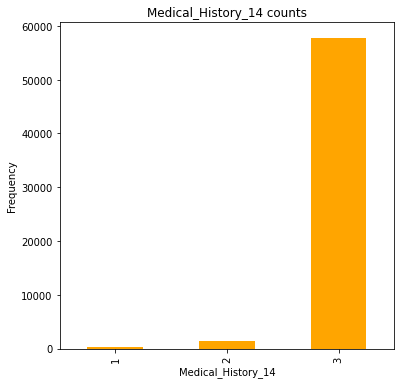

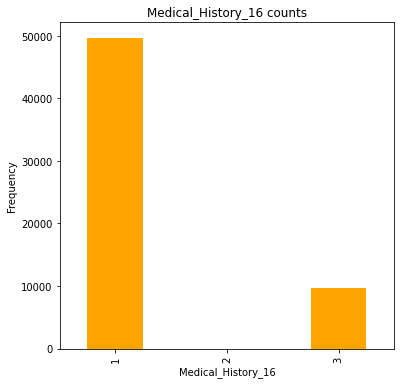

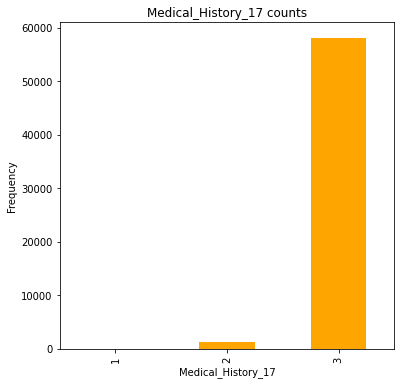

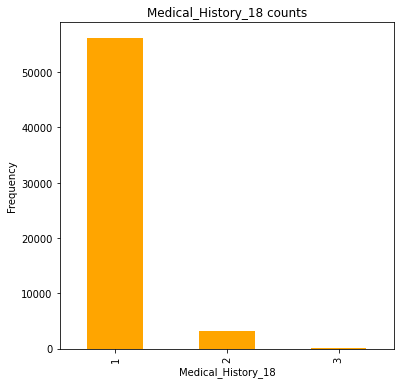

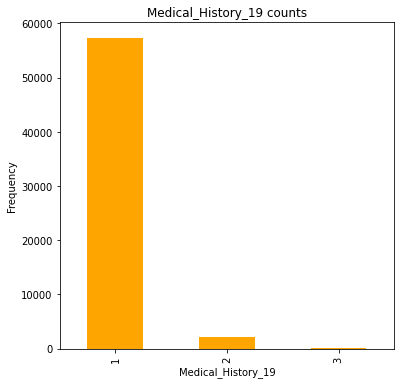

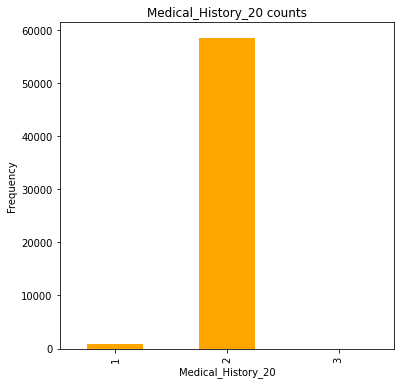

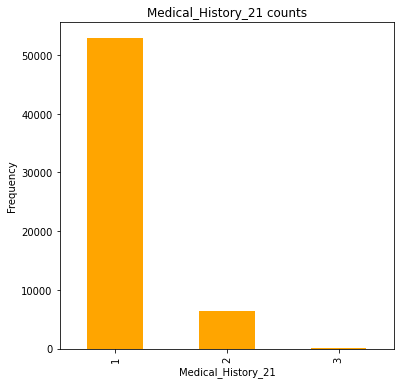

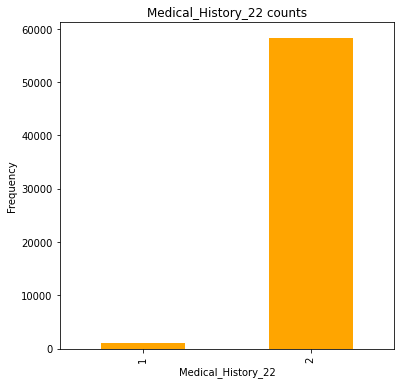

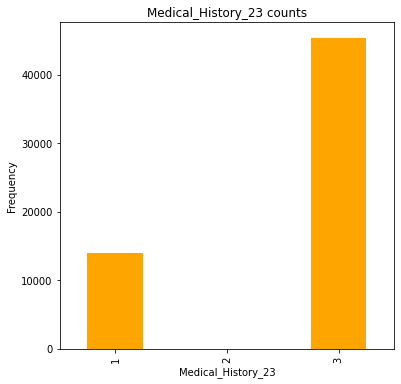

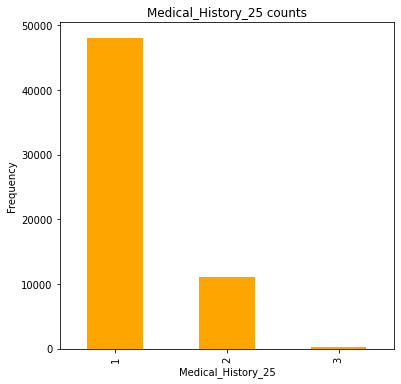

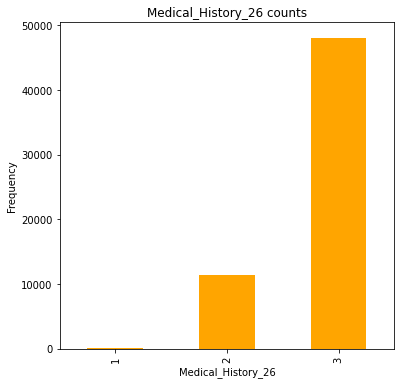

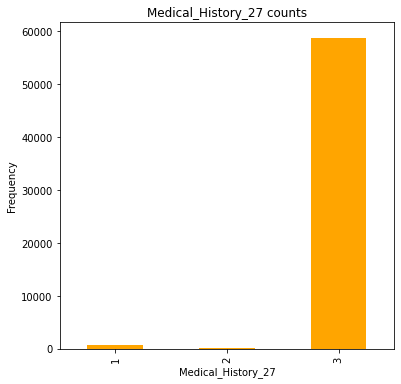

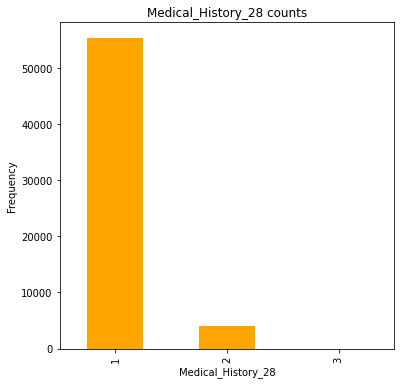

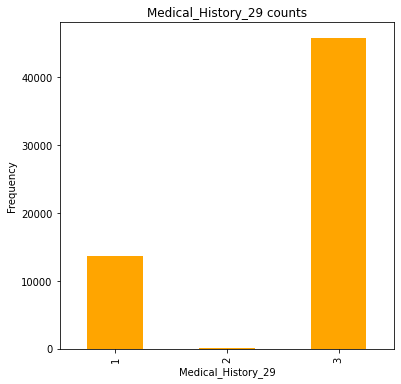

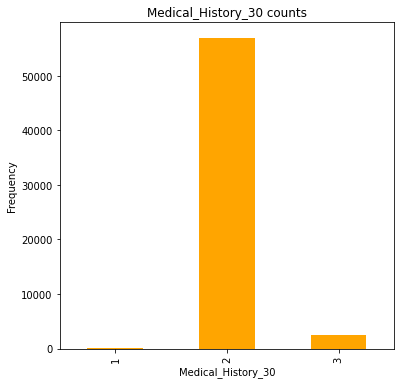

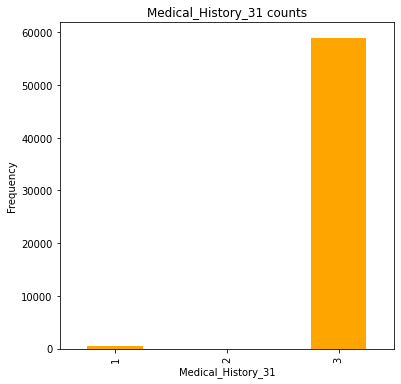

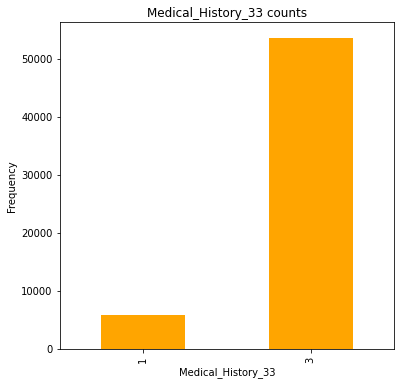

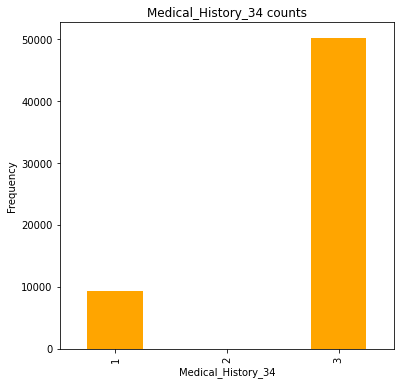

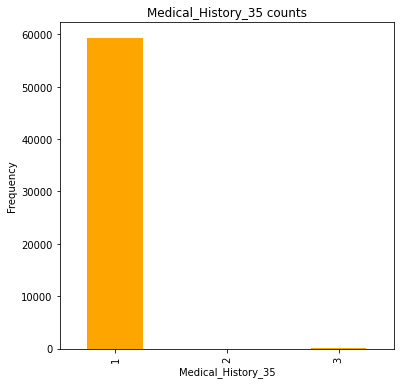

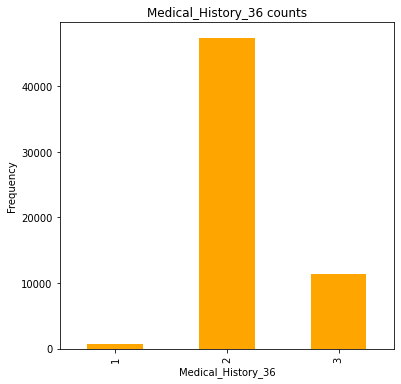

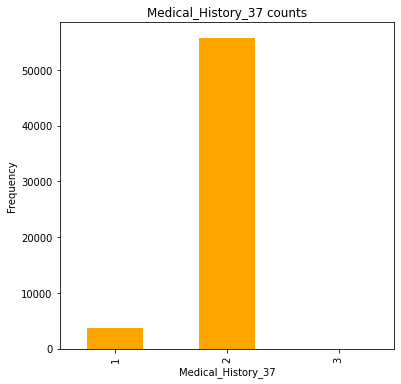

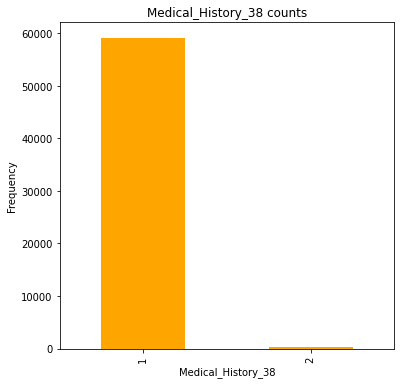

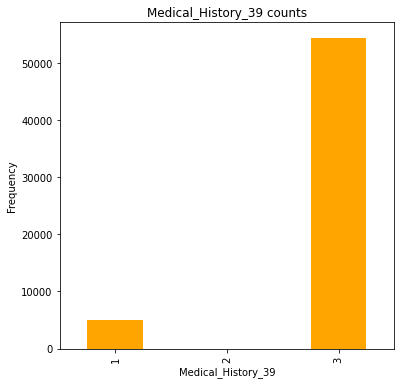

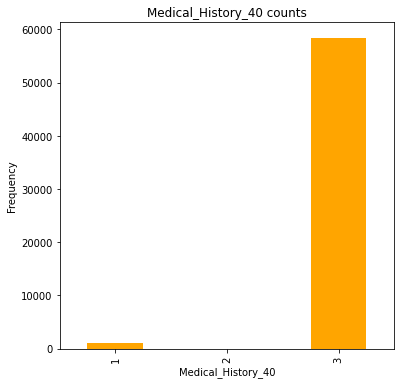

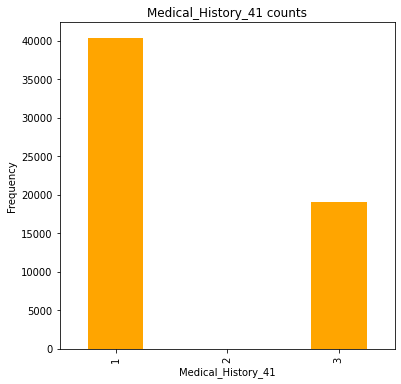

In [8]:
# Doing count plots for categorical
for col in categorical:
    counts = insurance_df[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
      fig = plt.figure(figsize=(6, 6))
    elif len(counts) >50 :
      continue
    else:
      fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='orange')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [9]:
corr = insurance_df.corr()
corr_greater_than_80 = corr[corr>=.8]
print(corr_greater_than_80)

                    Product_Info_4  Ins_Age   Ht        Wt       BMI  \
Product_Info_4                 1.0      NaN  NaN       NaN       NaN   
Ins_Age                        NaN      1.0  NaN       NaN       NaN   
Ht                             NaN      NaN  1.0       NaN       NaN   
Wt                             NaN      NaN  NaN  1.000000  0.854083   
BMI                            NaN      NaN  NaN  0.854083  1.000000   
...                            ...      ...  ...       ...       ...   
Medical_Keyword_46             NaN      NaN  NaN       NaN       NaN   
Medical_Keyword_47             NaN      NaN  NaN       NaN       NaN   
Medical_Keyword_48             NaN      NaN  NaN       NaN       NaN   
Response                       NaN      NaN  NaN       NaN       NaN   
Modified_Response              NaN      NaN  NaN       NaN       NaN   

                    Employment_Info_1  Employment_Info_4  Employment_Info_6  \
Product_Info_4                    NaN                NaN

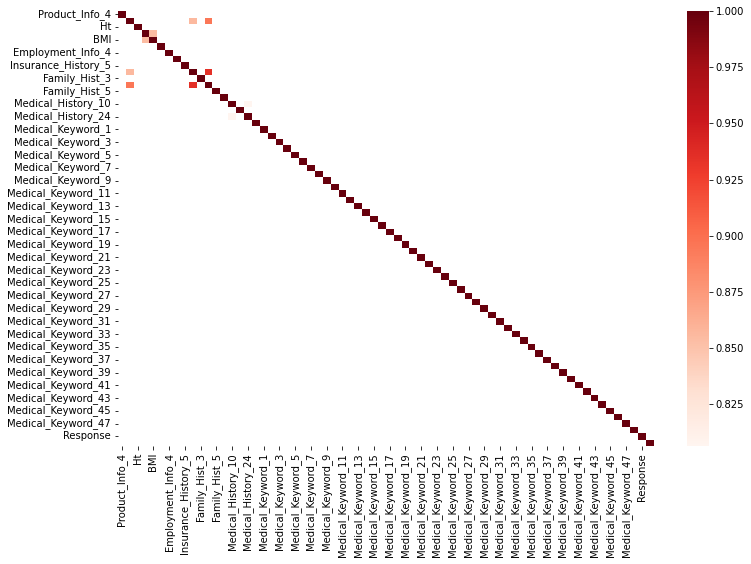

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_80, cmap="Reds");

Text(0.5, 1.0, 'Distribution of rows by response categories')

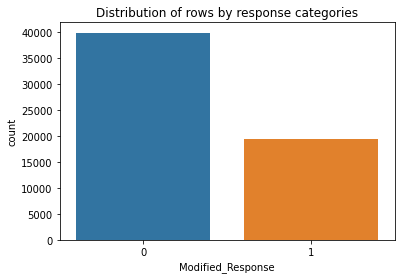

In [11]:
#EDA on new features
sns.countplot(x=insurance_df.Modified_Response).set_title('Distribution of rows by response categories')

In [12]:
# BMI Categorization
conditions = [
    (insurance_df['BMI'] <= insurance_df['BMI'].quantile(0.25)),
    (insurance_df['BMI'] > insurance_df['BMI'].quantile(0.25)) & (insurance_df['BMI'] <= insurance_df['BMI'].quantile(0.75)),
    (insurance_df['BMI'] > insurance_df['BMI'].quantile(0.75))]

choices = ['under_weight', 'average', 'overweight']

insurance_df['BMI_Wt'] = np.select(conditions, choices)

# Age Categorization
conditions = [
    (insurance_df['Ins_Age'] <= insurance_df['Ins_Age'].quantile(0.25)),
    (insurance_df['Ins_Age'] > insurance_df['Ins_Age'].quantile(0.25)) & (insurance_df['Ins_Age'] <= insurance_df['Ins_Age'].quantile(0.75)),
    (insurance_df['Ins_Age'] > insurance_df['Ins_Age'].quantile(0.75))]

choices = ['young', 'average', 'old']
insurance_df['Old_Young'] = np.select(conditions, choices)

# Height Categorization
conditions = [
    (insurance_df['Ht'] <= insurance_df['Ht'].quantile(0.25)),
    (insurance_df['Ht'] > insurance_df['Ht'].quantile(0.25)) & (insurance_df['Ht'] <= insurance_df['Ht'].quantile(0.75)),
    (insurance_df['Ht'] > insurance_df['Ht'].quantile(0.75))]

choices = ['short', 'average', 'tall']

insurance_df['Short_Tall'] = np.select(conditions, choices)

# Weight Categorization
conditions = [
    (insurance_df['Wt'] <= insurance_df['Wt'].quantile(0.25)),
    (insurance_df['Wt'] > insurance_df['Wt'].quantile(0.25)) & (insurance_df['Wt'] <= insurance_df['Wt'].quantile(0.75)),
    (insurance_df['Wt'] > insurance_df['Wt'].quantile(0.75))]

choices = ['thin', 'average', 'fat']

insurance_df['Thin_Fat'] = np.select(conditions, choices)

<AxesSubplot:xlabel='BMI_Wt', ylabel='count'>

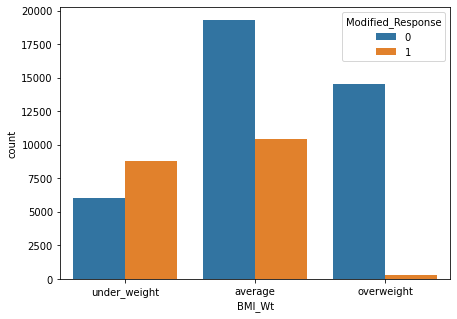

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'BMI_Wt', hue = 'Modified_Response', data = insurance_df)

<AxesSubplot:xlabel='Old_Young', ylabel='count'>

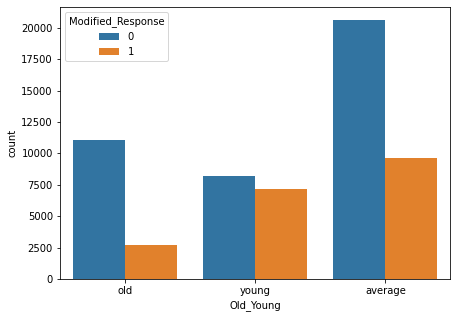

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'Old_Young', hue = 'Modified_Response', data = insurance_df)

<AxesSubplot:xlabel='Short_Tall', ylabel='count'>

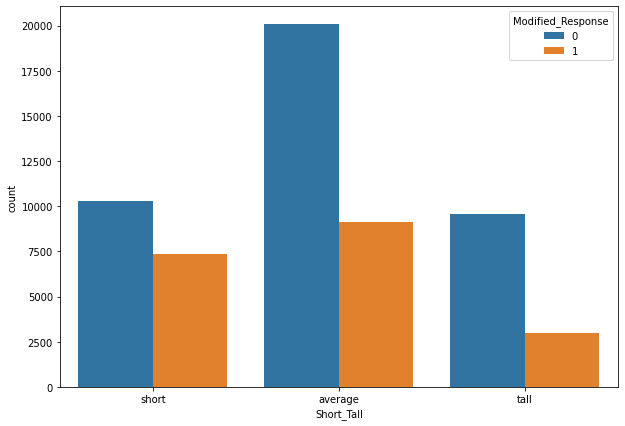

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Short_Tall', hue = 'Modified_Response', data = insurance_df)

<AxesSubplot:xlabel='Thin_Fat', ylabel='count'>

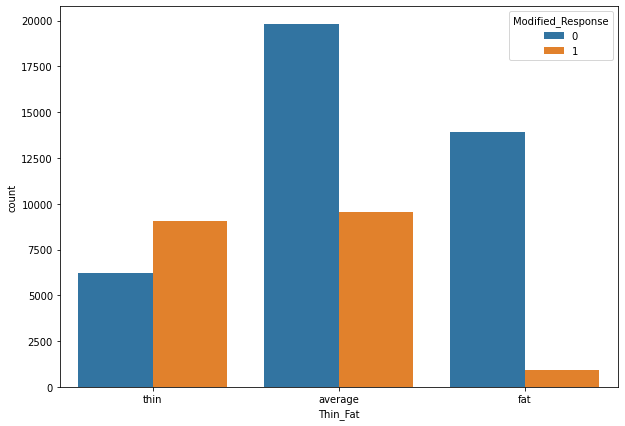

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Thin_Fat', hue = 'Modified_Response', data = insurance_df)

In [17]:
def new_target(row):
    if (row['BMI_Wt']=='overweight') or (row['Old_Young']=='old')  or (row['Thin_Fat']=='fat'):
        val='extremely_risky'
    else:
        val='not_extremely_risky'
    return val

insurance_df['extreme_risk'] = insurance_df.apply(new_target,axis=1)

<AxesSubplot:xlabel='extreme_risk', ylabel='count'>

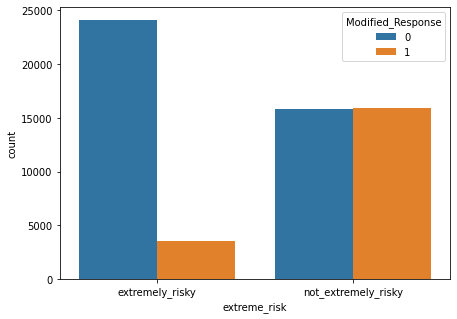

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'extreme_risk', hue = 'Modified_Response', data = insurance_df)

In [19]:
def new_target(row):
    if (row['BMI_Wt']=='under_weight') or (row['Old_Young']=='young')  or (row['Thin_Fat']=='thin'):
        val='low_end'
    else:
        val='non_low_end'
    return val

insurance_df['low_end_risk'] = insurance_df.apply(new_target,axis=1)

<AxesSubplot:xlabel='low_end_risk', ylabel='count'>

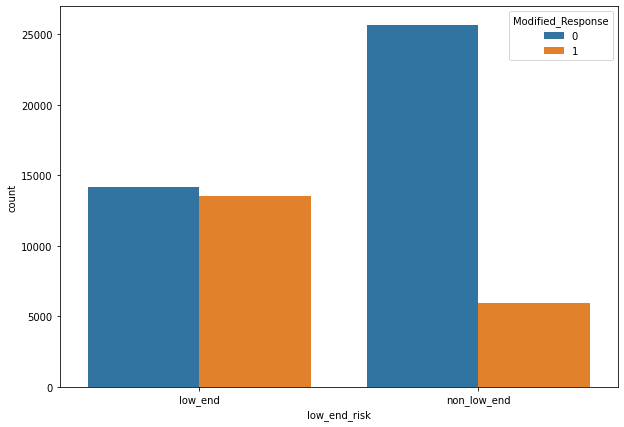

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'low_end_risk', hue = 'Modified_Response', data = insurance_df)

<AxesSubplot:xlabel='Product_Info_1', ylabel='Density'>

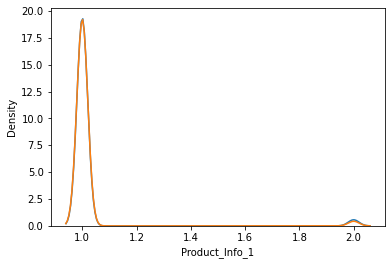

In [21]:
sns.distplot(insurance_df[insurance_df['Modified_Response']==0]['Product_Info_1'],hist=False,label='Rejected')
sns.distplot(insurance_df[insurance_df['Modified_Response']==1]['Product_Info_1'],hist=False,label='Accepted')

<AxesSubplot:xlabel='Product_Info_3', ylabel='Density'>

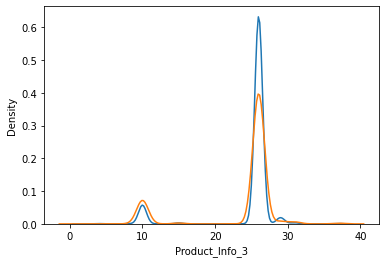

In [22]:
sns.distplot(insurance_df[insurance_df['Modified_Response']==0]['Product_Info_3'],hist=False,label='Rejected')
sns.distplot(insurance_df[insurance_df['Modified_Response']==1]['Product_Info_3'],hist=False,label='Accepted')

In [23]:
insurance_df.drop('Product_Info_2',axis=1,inplace=True)

In [24]:
missing_val_count_by_column = insurance_df.isnull().sum()/len(insurance_df)
print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [25]:
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,how='all',axis=1)
insurance_df.drop('Response',axis=1,inplace=True)


In [26]:
X = insurance_df.drop(labels=['Modified_Response','low_end_risk','extreme_risk','Old_Young','Thin_Fat','BMI_Wt','Short_Tall'],axis=1)
# Data for the dependent variable
Y = insurance_df['Modified_Response']

In [27]:
# Filling remaining missing values with mean
X = X.fillna(X.mean())

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [29]:
# Utility Functions
def check_scores(model, X_train, X_test ):
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(Y_train,train_class_preds)
  test_accuracy = accuracy_score(Y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(Y_train,train_class_preds)
  test_cm = confusion_matrix(Y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(Y_train,train_preds)
  test_auc = roc_auc_score(Y_test,test_preds)

  print('ROC on train data:', train_auc)
  print('ROC on test data:', test_auc)
  
  # Fscore, precision and recall on test data
  f1 = f1_score(Y_test, test_class_preds)
  precision = precision_score(Y_test, test_class_preds)
  recall = recall_score(Y_test, test_class_preds) 
  
  
  #R2 score on train and test data
  train_log = log_loss(Y_train,train_preds)
  test_log = log_loss(Y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log


def check_importance(model, X_train):
  #Checking importance of features
  importances = model.feature_importances_
  
  #List of columns and their importances
  importance_dict = {'Feature' : list(X_train.columns),
                    'Feature Importance' : importances}
  #Creating a dataframe
  importance_df = pd.DataFrame(importance_dict)
  
  #Rounding it off to 2 digits as we might get exponential numbers
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  return importance_df.sort_values(by=['Feature Importance'],ascending=False)

def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  pprint( grid.best_params_)

  return optimal_model



# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(model, X_test):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification')
  

  exp = interpretor.explain_instance(
      data_row=X_test.iloc[10], 
      predict_fn=model.predict_proba
  )

  exp.show_in_notebook(show_table=True)

# This gives feature importance
def plot_feature_importance(model, X_train):
  # PLotting features vs their importance factors
  fig = plt.figure(figsize = (15, 8))
  
  # Extracting importance values
  values =check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature Importance'].values
  
  
  # Extracting importance features
  features = check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature'].values

  plt.bar(features, values, color ='blue',
          width = 0.4)
  plt.xticks( rotation='vertical')
  plt.show()

In [30]:
#Random Forest
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
rf_parameters = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

pprint(rf_parameters)

#finding the best model
rf_optimal_model = grid_search(RandomForestClassifier(), rf_parameters, X_train, Y_train)


{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}
Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   2.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   2.2s


[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   1.5s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   2.8s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   2.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   2.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   3.8s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   1.8s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   1.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   2.8s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   2.5s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=1

In [31]:
# Getting scores from all the metrices
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall,rf_train_log, rf_test_log = check_scores(rf_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.8104861345009543
The accuracy on test dataset is 0.8020342179711707

Train confusion matrix:
[[27151  2756]
 [ 5684  8944]]

Test confusion matrix:
[[9034  951]
 [1988 2873]]

ROC on train data: 0.8923200249092303
ROC on test data: 0.884778288601386

Train log loss: 0.42646799025318816
Test log loss: 0.4320041287908957

F score is: 0.6616004605641911
Precision is: 0.7513075313807531
Recall is: 0.5910306521291915


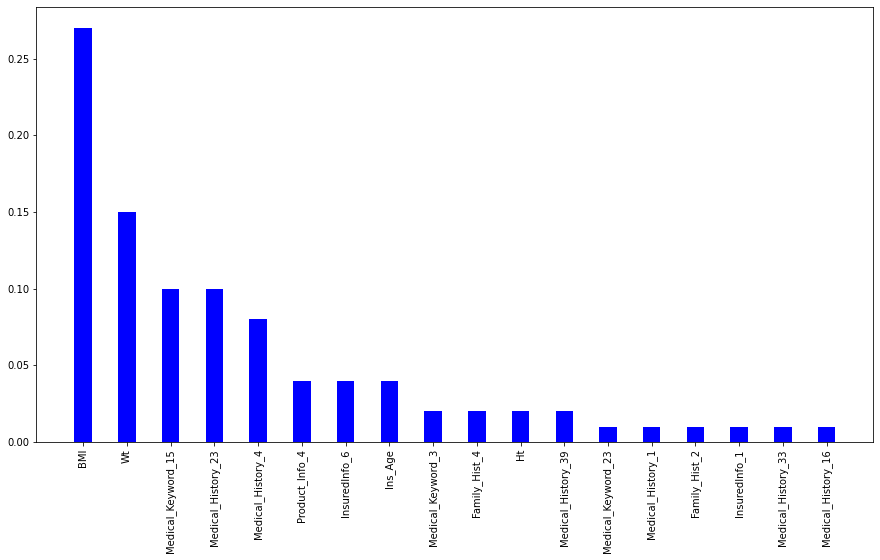

In [32]:
# Getting the feature importance for all the features
check_importance(rf_model, X_train)
# PLotting only those features which are contributing something
plot_feature_importance(rf_model, X_train)

In [33]:
#Gradient Boosting
#finding the best model
gb_parameters ={
    "n_estimators":[5,50,250],
    "max_depth":[1,3,5,7],
    "learning_rate":[0.01,0.1,1]
}

pprint(gb_parameters)

gb_optimal_model = grid_search(GradientBoostingClassifier(), gb_parameters, X_train, Y_train)

{'learning_rate': [0.01, 0.1, 1],
 'max_depth': [1, 3, 5, 7],
 'n_estimators': [5, 50, 250]}
Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.3s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.4s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   2.9s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=250; total time=  14.6s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=250; total time=  10.2s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.6s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   5.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   5.7s
[CV] END ..learning_rate=0.01, max_d

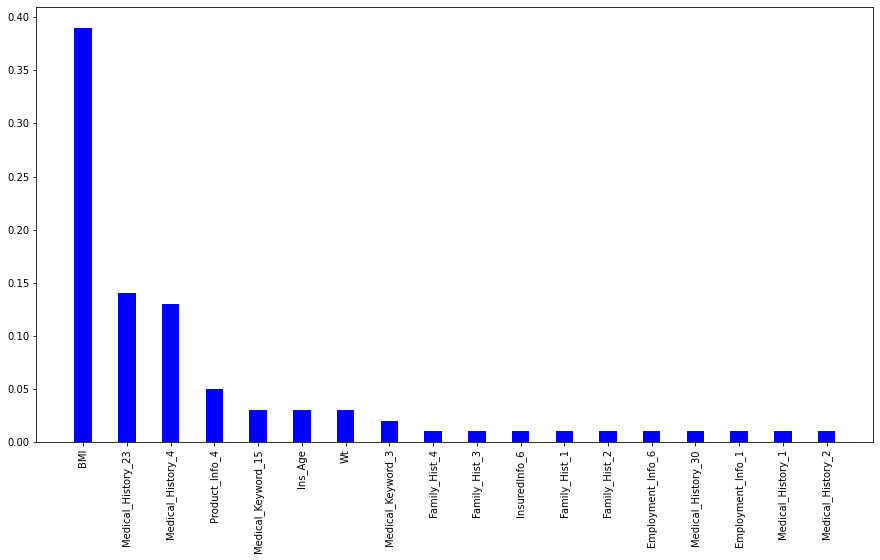

In [34]:
# X_train.drop('Response',axis=1,inplace=True)
check_importance(gb_optimal_model, X_train)
# PLotting only those features which are contributing something
plot_feature_importance(gb_optimal_model, X_train)

In [35]:
gb_model, gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_f1, gb_precision,gb_recall,gb_train_log, gb_test_log = check_scores(gb_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.8641517907263949
The accuracy on test dataset is 0.8346355920786744

Train confusion matrix:
[[26638  3269]
 [ 2781 11847]]

Test confusion matrix:
[[8727 1258]
 [1197 3664]]

ROC on train data: 0.9377448234180047
ROC on test data: 0.909797735072059

Train log loss: 0.30320271156477785
Test log loss: 0.35275793437420944

F score is: 0.7490544822651538
Precision is: 0.7444128403088176
Recall is: 0.7537543715284921


In [36]:
xgb_parameters = {'max_depth': [1,3,5], 'n_estimators': [2,5,10], 'learning_rate': [.01 , .1, .5]}
print('XGB parameters areL:')
pprint(xgb_parameters)
#finding the best model
xgb_optimal_model = grid_search(XGBClassifier(), xgb_parameters, X_train, Y_train)

XGB parameters areL:
{'learning_rate': [0.01, 0.1, 0.5],
 'max_depth': [1, 3, 5],
 'n_estimators': [2, 5, 10]}
Fitting 2 folds for each of 27 candidates, totalling 54 fits
[23:28:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=2; total time=   1.5s
[23:28:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=2; total time=   0.0s
[23:28:52] WARNING: C:/Users/Administrator/wor

[23:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=5; total time=   0.0s
[23:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=10; total time=   0.1s
[23:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

[23:29:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....learning_rate=0.5, max_depth=3, n_estimators=2; total time=   0.1s
[23:29:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....learning_rate=0.5, max_depth=3, n_estimators=2; total time=   0.1s
[23:29:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

In [37]:
# Getting the scores for all the score metrics used here
xgb_model, xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_f1, xgb_precision,xgb_recall,xgb_train_log, xgb_test_log= check_scores(xgb_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.830672504771528
The accuracy on test dataset is 0.825272800754412

Train confusion matrix:
[[25730  4177]
 [ 3364 11264]]

Test confusion matrix:
[[8566 1419]
 [1175 3686]]

ROC on train data: 0.9070705299819286
ROC on test data: 0.9015875283816488

Train log loss: 0.36021934797456384
Test log loss: 0.368680357765126

F score is: 0.7397150311057596
Precision is: 0.7220372184133202
Recall is: 0.7582801892614688


In [38]:
#logistic regression
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_parameters = dict(solver=solvers,penalty=penalty,C=c_values)# define grid search

#finding the best model
lr_optimal_model = grid_search(LogisticRegression( max_iter=5000), lr_parameters, X_train, Y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=  18.3s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=  17.2s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  20.9s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  24.8s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=  18.1s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=  18.6s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  13.9s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=  11.6s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   4.7s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=  14.0s


Best parameters are: 
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [39]:
# Getting the scores for all the score metrics used here

lr_model, lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_f1, lr_precision, lr_recall,lr_train_log, lr_test_log = check_scores(lr_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.8137420006736275
The accuracy on test dataset is 0.8104539943419102

Train confusion matrix:
[[26102  3805]
 [ 4490 10138]]

Test confusion matrix:
[[8717 1268]
 [1546 3315]]

ROC on train data: 0.8853250906814865
ROC on test data: 0.8811880029466127

Train log loss: 0.39569086290801353
Test log loss: 0.4012947323951756

F score is: 0.7020330368487929
Precision is: 0.7233253327514728
Recall is: 0.6819584447644518


In [40]:
# Appending all the models to estimators list
estimators = []

estimators.append(('logistic', lr_optimal_model))
estimators.append(('XGB', xgb_optimal_model))
estimators.append(('GB', gb_optimal_model))
estimators.append(('rf', rf_optimal_model))

# create the voting model
voting_model = VotingClassifier(estimators, voting='soft')

voting_model.fit(X_train, Y_train)

[23:33:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=10, max_iter=5000)),
                             ('XGB',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.5, max_delta_step=0,
                                            max_depth=5, min_child_weight=1,
                                            m...
                                            n_estimators=10, n_jobs=8,
                                            num_parallel_tree=1,
       

In [41]:
# Getting all the scores and errors
voting_model, voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_f1, voting_precision, voting_recall, voting_train_log, voting_test_log = check_scores(voting_model, X_train, X_test )

The accuracy on train dataset is 0.8397215673066127
The accuracy on test dataset is 0.8285059948807759

Train confusion matrix:
[[26520  3387]
 [ 3751 10877]]

Test confusion matrix:
[[8814 1171]
 [1375 3486]]

ROC on train data: 0.9177624549145831
ROC on test data: 0.904290070159755

Train log loss: 0.3580798493641119
Test log loss: 0.3751336302676553

F score is: 0.7325068291657912
Precision is: 0.74855056903586
Recall is: 0.7171363916889529


In [44]:
# Making a dataframe of all the scores for every model

scores_ = [("Random Forest", rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_train_log, rf_test_log,rf_f1, rf_precision, rf_recall),
("Gradient Boosting",  gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_train_log, gb_test_log,gb_f1, gb_precision,gb_recall,),
("XG Boost", xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_train_log, xgb_test_log,xgb_f1, xgb_precision, xgb_recall),
("Logistic Regression", lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_train_log, lr_test_log,lr_f1, lr_precision, lr_recall,),
("Voting Classifier", voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_train_log, voting_test_log, voting_f1, voting_precision, voting_recall) ]

Scores_ =pd.DataFrame(data = scores_, columns=['Model Name', 'Train ROC', 'Test ROC', 'Train Accuracy', 'Test Accuracy', 'Train Log Loss','Test Log Loss','F-Score', 'Precision','Recall',])
Scores_.set_index('Model Name', inplace = True)

Scores_

,Train ROC,Test ROC,Train Accuracy,Test Accuracy,Train Log Loss,Test Log Loss,F-Score,Precision,Recall
Model Name,,,,,,,,,
Random Forest,0.892320,0.884778,0.810486,0.802034,0.426468,0.432004,0.661600,0.751308,0.591031
Gradient Boosting,0.937745,0.909798,0.864152,0.834636,0.303203,0.352758,0.749054,0.744413,0.753754
XG Boost,0.907071,0.901588,0.830673,0.825273,0.360219,0.368680,0.739715,0.722037,0.758280
Logistic Regression,0.885325,0.881188,0.813742,0.810454,0.395691,0.401295,0.702033,0.723325,0.681958
Voting Classifier,0.917762,0.904290,0.839722,0.828506,0.358080,0.375134,0.732507,0.748551,0.717136
